In [40]:
if (!require(Ecdat)) install.packages("Ecdat")
library(Ecdat)
if (!require(ggplot2)) install.packages("ggplot2")
library(ggplot2) 
if (!require(ISLR)) install.packages("ISLR")
library(ISLR)
if (!require(GGally)) install.packages("GGally")
library(GGally)
if (!require(car)) install.packages("car")
library(car)
if (!require(scatterplot3d)) install.packages("scatterplot3d")
library(scatterplot3d)
if (!require(tidyverse)) install.packages("tidyverse")
library(tidyverse)

if (!require(ggExtra))install.packages("ggExtra")
library("ggExtra")

if (!require(ROCR)) install.packages("ROCR")
library("ROCR")

In [41]:
logit_grade <- read_csv("GradesR.csv", col_types = list(
  Student = col_integer(),
  Grade = col_integer(),
  Hours = col_double()))


In [42]:
head(logit_grade,10)

Student,Grade,Hours
1,0,38
2,0,30
3,0,40
4,0,40
5,0,52
6,0,23
7,0,61
8,0,32
9,0,43
10,0,32


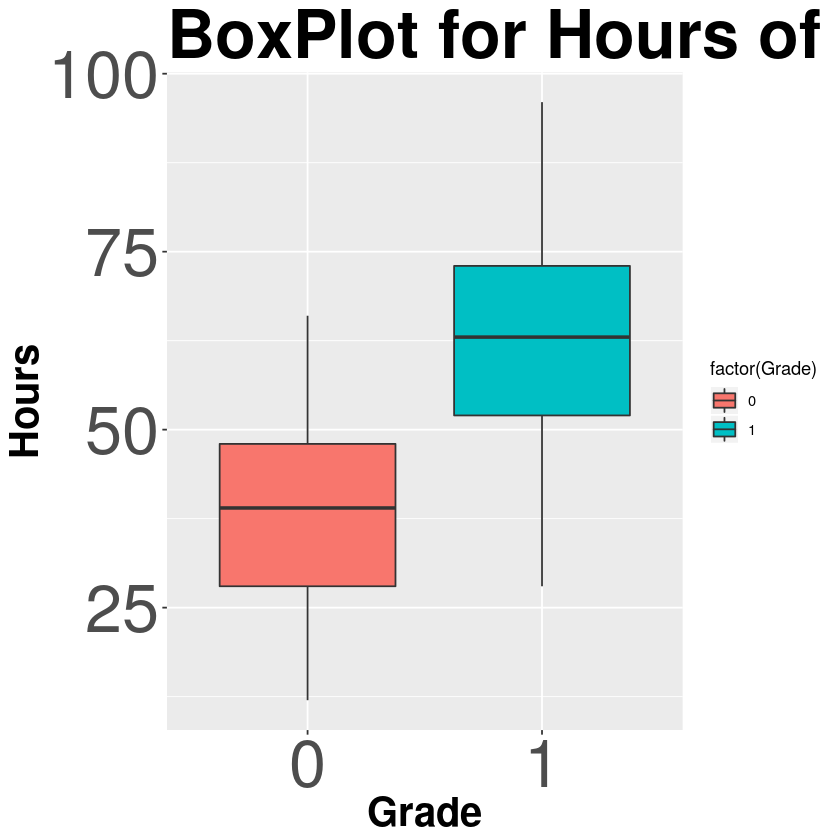

In [43]:
# boxplot of Hours vs. Grade  (Need to use Grade as a factor)
 ggplot(data=logit_grade, aes(x=factor(Grade), y = Hours, fill=factor(Grade))) + 
  geom_boxplot() +
  ggtitle("BoxPlot for Hours of Studying vs. Grade") + theme(plot.title = element_text(size = 40, face = "bold")) +
  labs(x="Grade", y="Hours") + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
  axis.title=element_text(size=24,face="bold"))

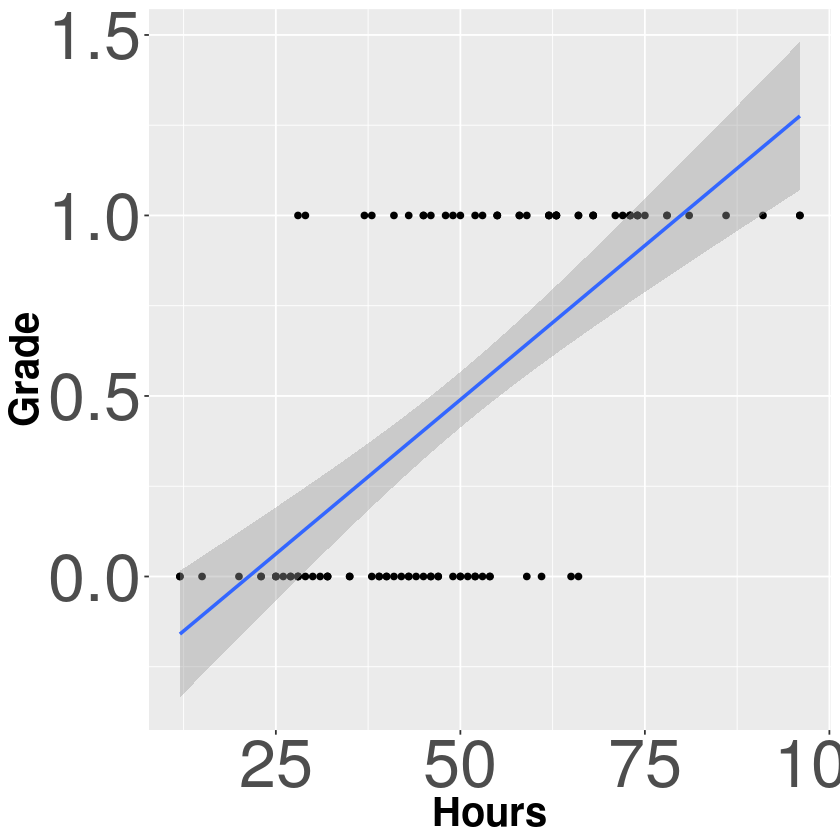

In [44]:
# Scatter Plot + Linear Regression line of Grade vs. Hours 
 
ggplot(logit_grade, aes(x=Hours, y=Grade)) + geom_point() +
  scale_colour_hue(l=50) + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
  axis.title=element_text(size=24,face="bold")) + 
  geom_smooth(method=lm,   # Add linear regression lines
              se=TRUE,    # Don't add shaded confidence region
              fullrange=TRUE) 

In [45]:
# Using Linear Regression to Model Binary Outcomes

a.lm <- lm(formula = Grade ~ Hours, data = logit_grade)
summary(a.lm)
anova(a.lm)


Call:
lm(formula = Grade ~ Hours, data = logit_grade)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7630 -0.3060 -0.0284  0.2883  0.8862 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.364520   0.111263  -3.276  0.00146 ** 
Hours        0.017084   0.002084   8.197 9.61e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3889 on 98 degrees of freedom
Multiple R-squared:  0.4068,	Adjusted R-squared:  0.4007 
F-statistic:  67.2 on 1 and 98 DF,  p-value: 9.606e-13


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Hours,1,10.16506,10.1650648,67.196,9.605623e-13
Residuals,98,14.82494,0.1512748,NA,NA


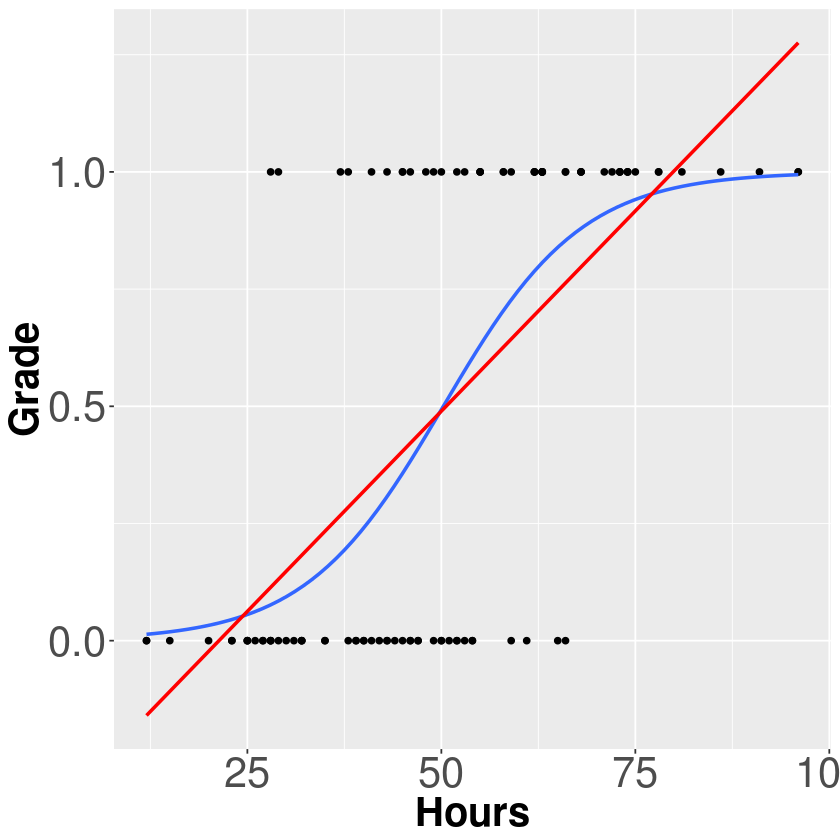

In [46]:
# Scatter Plot + Linear Regression line of Grade vs. Hours + Logistic Model Curve

ggplot(logit_grade, aes(x=Hours, y=Grade)) + geom_point() + 
  theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=25), 
  axis.title=element_text(size=24,face="bold")) + 
# add logit curve
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE) +
#add the regression line
    geom_smooth(method=lm,  color="red", # Add linear regression lines
              se=FALSE,    # Don't add shaded confidence region
              fullrange=TRUE) 
  

In [47]:
ol <- read_csv("oddslogodds.csv", col_types = list(
  p = col_double(),
  odds = col_double(),
  logodds = col_double()))

In [48]:
ol

p,odds,logodds
0.001,0.001,-6.9
0.010,0.010,-4.6
0.050,0.053,-2.9
0.100,0.111,-2.2
0.150,0.176,-1.7
0.200,0.250,-1.4
0.250,0.333,-1.1
0.300,0.429,-0.8
0.350,0.538,-0.6
0.400,0.667,-0.4


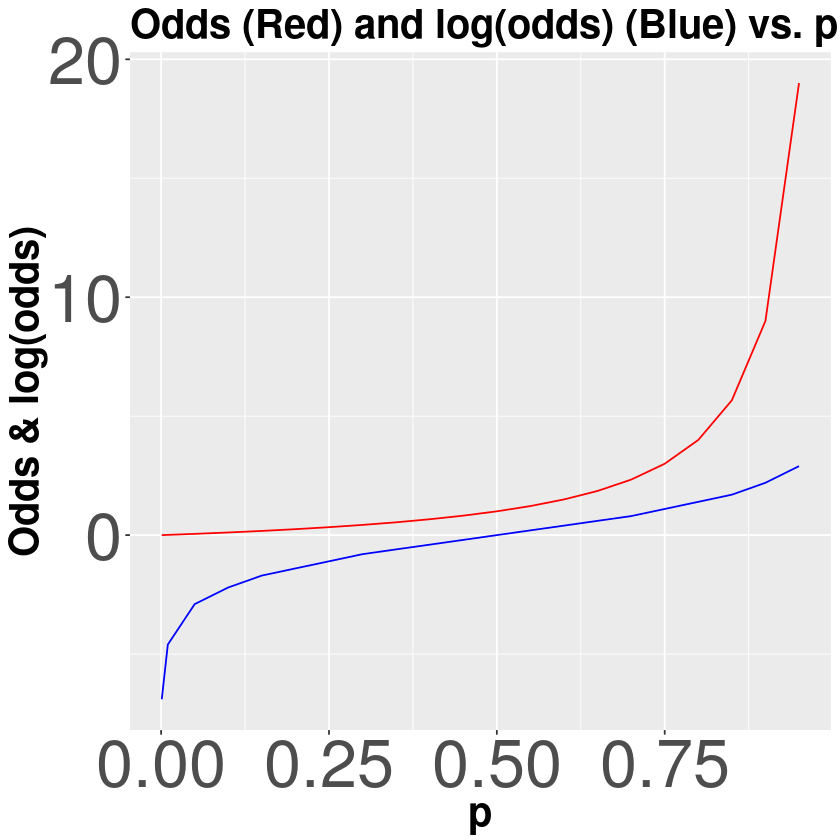

In [49]:
#
# Plot Probability, Odds, and Log of Odds
#
ggplot(ol, aes(x=p)) +
  geom_line(aes(y=odds), colour ="red") +
  geom_line(aes(y=logodds), colour ="blue") +
  ggtitle("Odds (Red) and log(odds) (Blue) vs. p") + theme(plot.title = element_text(size = 24, face = "bold")) +
  labs(x="p", y="Odds & log(odds)") +
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
  axis.title=element_text(size=24,face="bold"))


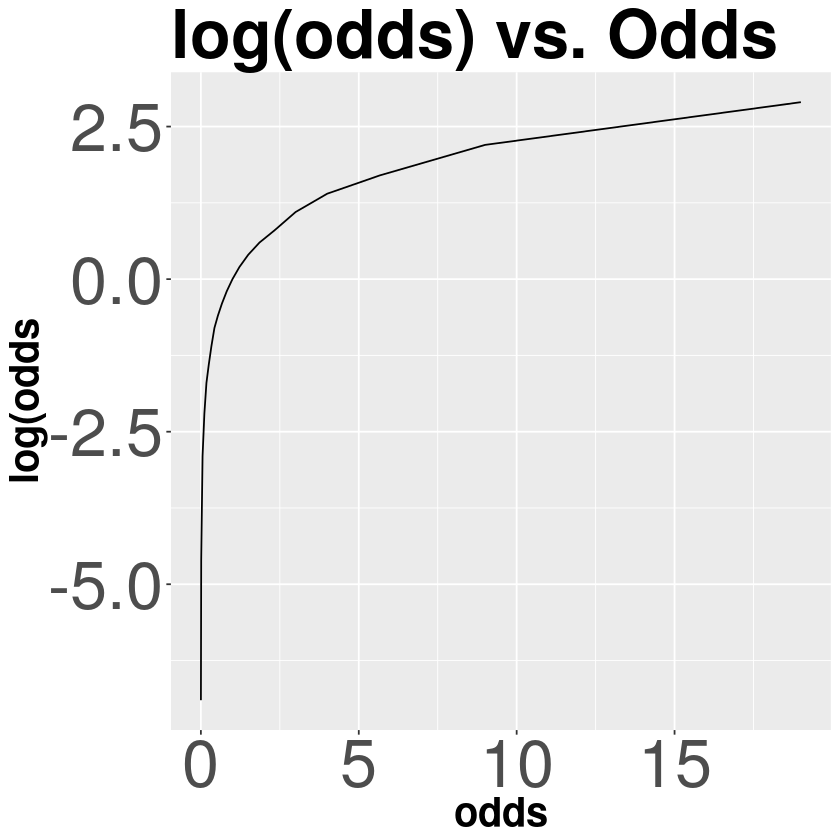

In [50]:
# plot of log odds vs odds

ggplot(ol, aes(x=odds)) +
  geom_line(aes(y=logodds), colour ="Black") + 
  ggtitle("log(odds) vs. Odds") + theme(plot.title = element_text(size = 40, face = "bold")) +
  labs(x="odds", y="log(odds") +
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.text=element_text(size=40), axis.title=element_text(size=24,face="bold"))

In [70]:
??Default

In [52]:
str(ISLR::Default)
 
df <- ISLR::Default
df<- df %>%
  mutate(dft = ifelse(default=="Yes",1,0)) %>%
  mutate(stdt = ifelse(student=="Yes",1,0)) 


'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


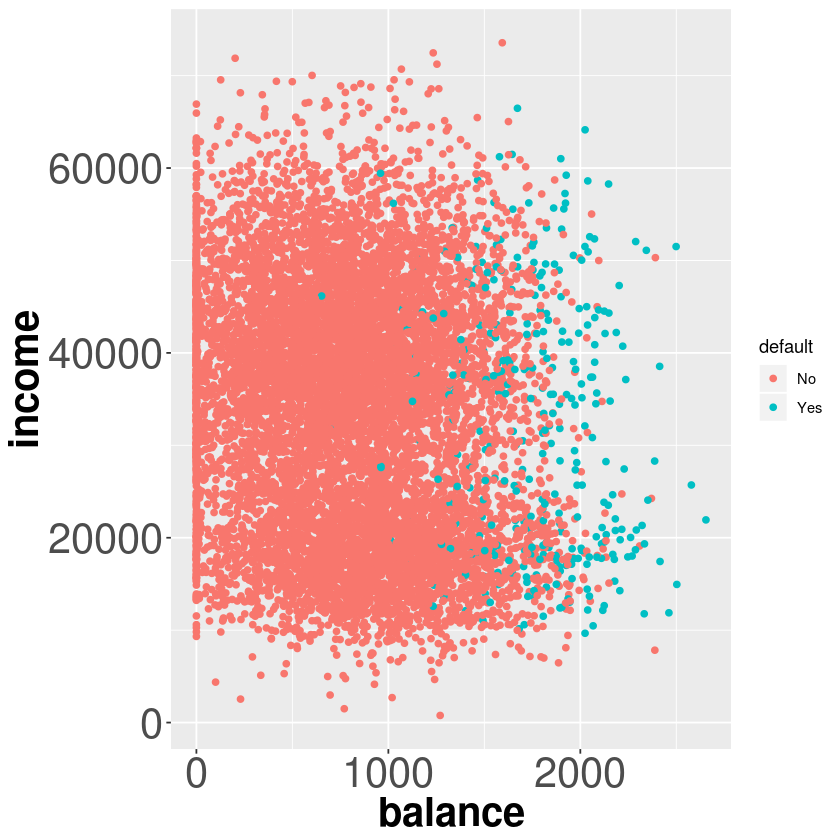

In [53]:
# Scatterplot of Income vs. Balance (Default in Blue)

ggplot(data = df) + 
  geom_point(mapping = aes(x = balance, y = income, color = default)) + 
  theme(axis.text.x = element_text(size=25), axis.text.y = element_text(size=25), 
  axis.title=element_text(size=24,face="bold"))


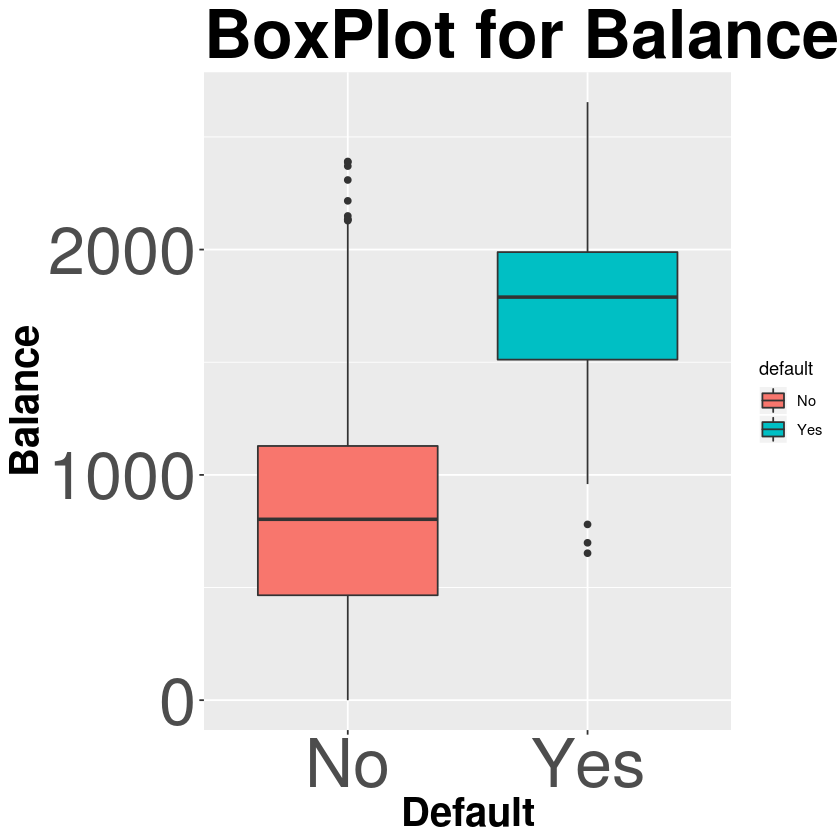

In [54]:
# BoxPlot for Balance vs. Default Status
ggplot(data=df, aes(x=default, y = balance, fill=default)) + 
  geom_boxplot() +
  ggtitle("BoxPlot for Balance vs. Default Status") + theme(plot.title = element_text(size = 40, face = "bold")) +
#  labs(title="BoxPlot for Balance vs. Default Status") +
  labs(x="Default", y="Balance") + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
  axis.title=element_text(size=24,face="bold"))


In [55]:
#  Run different logit models

# Model1 has no predictor variables
Model1 <- glm(dft ~ 1 , data = df, family = "binomial")
summary(Model1)



Call:
glm(formula = dft ~ 1, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2603  -0.2603  -0.2603  -0.2603   2.6085  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.36833    0.05574  -60.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2920.6  on 9999  degrees of freedom
AIC: 2922.6

Number of Fisher Scoring iterations: 6


In [56]:
# Get the count of defaulters and non-defaulters in the dataframe df 
# using the group_by function

df %>% 
  group_by(default) %>%
  summarise(n=n())

default,n
No,9667
Yes,333


In [57]:
# Model 2: logit(p) = b0 + b1*stdt (single 0/1 predictor variable)
Model2 <- glm(dft ~ stdt , data = df, family = "binomial")
summary(Model2)


Call:
glm(formula = dft ~ stdt, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
stdt         0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


In [58]:
# Model 3: logit(p) = b0 + b1*balance (single continuous predictor variable)
Model3 <- glm(dft ~ balance, data = df, family = "binomial")
summary(Model3)


Call:
glm(formula = dft ~ balance, family = "binomial", data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


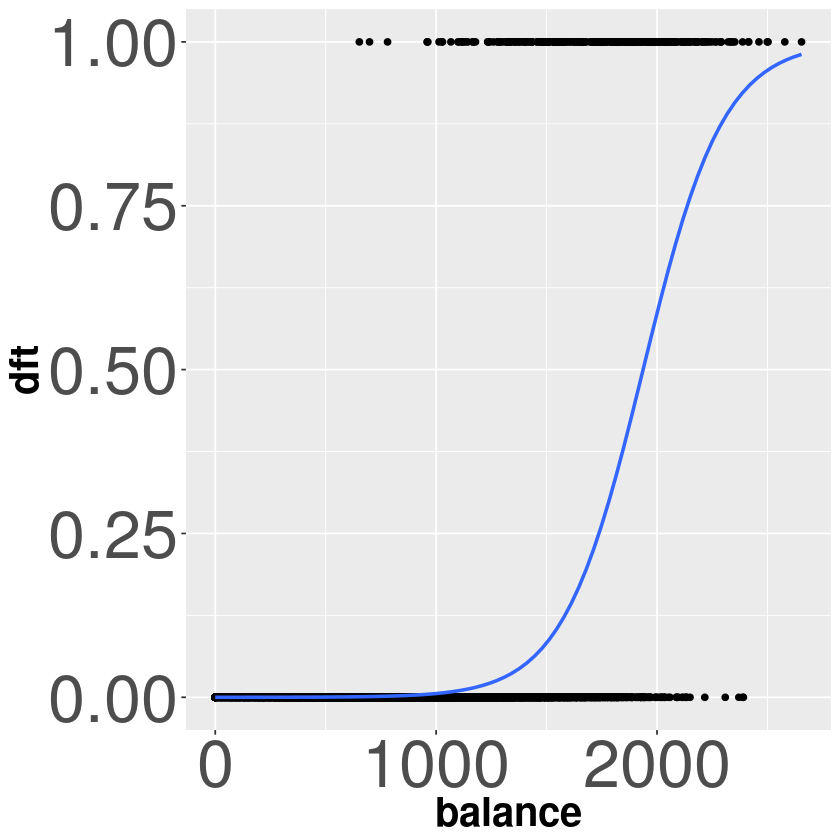

In [59]:
# plot default rate for the entire population of students and non-students
ggplot(df, aes(x=balance, y=dft)) + geom_point() + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.text=element_text(size=40), axis.title=element_text(size=24,face="bold")) + 
  # add logit curve
  stat_smooth(method="glm", method.args=list(family="binomial"), se=FALSE) 


In [60]:
# Model 4: logit(p) = b0 + b1*balance + b2*income + b3*stdt
Model4 <- glm(dft ~ balance + income + stdt, data = df, family = "binomial")
summary(Model4)



Call:
glm(formula = dft ~ balance + income + stdt, family = "binomial", 
    data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
stdt        -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


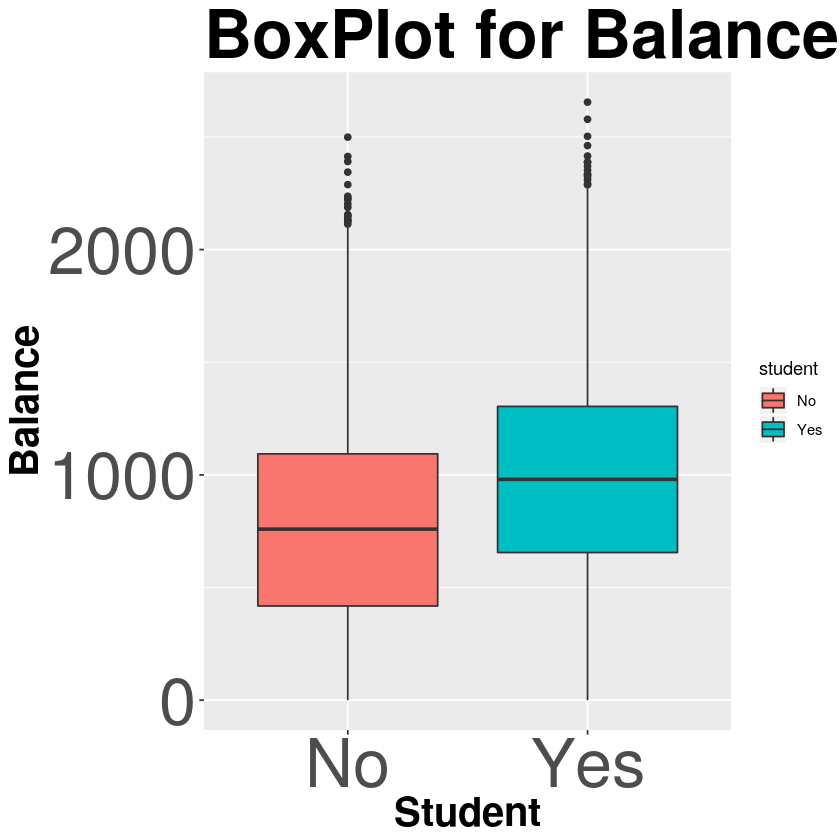

In [61]:
# boxplot
ggplot(data=df, aes(x=student, y = balance, fill=student)) + 
  geom_boxplot() +
  ggtitle("BoxPlot for Balance vs. Student Status") + theme(plot.title = element_text(size = 40, face = "bold")) +
  #  labs(title="BoxPlot for Balance vs. Student Status") +
  labs(x="Student", y="Balance") + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
        axis.text=element_text(size=40), axis.title=element_text(size=24,face="bold"))

In [62]:
# make predictions using Model 4

df <-  df %>% 
  mutate(pred_prob_model4 = predict(Model4, newdata = ., type = "response")) %>% 
  mutate(pred_outcome_model4 = ifelse(pred_prob_model4 >= 0.5,1,0))
# we are using 0.5 as cutoff for predicting Y=1. 
df


default,student,balance,income,dft,stdt,pred_prob_model4,pred_outcome_model4
No,No,729.5265,44361.625,0,0,1.428724e-03,0
No,Yes,817.1804,12106.135,0,1,1.122204e-03,0
No,No,1073.5492,31767.139,0,0,9.812272e-03,0
No,No,529.2506,35704.494,0,0,4.415893e-04,0
No,No,785.6559,38463.496,0,0,1.935506e-03,0
No,Yes,919.5885,7491.559,0,1,1.989518e-03,0
No,No,825.5133,24905.227,0,0,2.333767e-03,0
No,Yes,808.6675,17600.451,0,1,1.086718e-03,0
No,No,1161.0579,37468.529,0,0,1.638333e-02,0
No,No,0.0000,29275.268,0,0,2.080617e-05,0


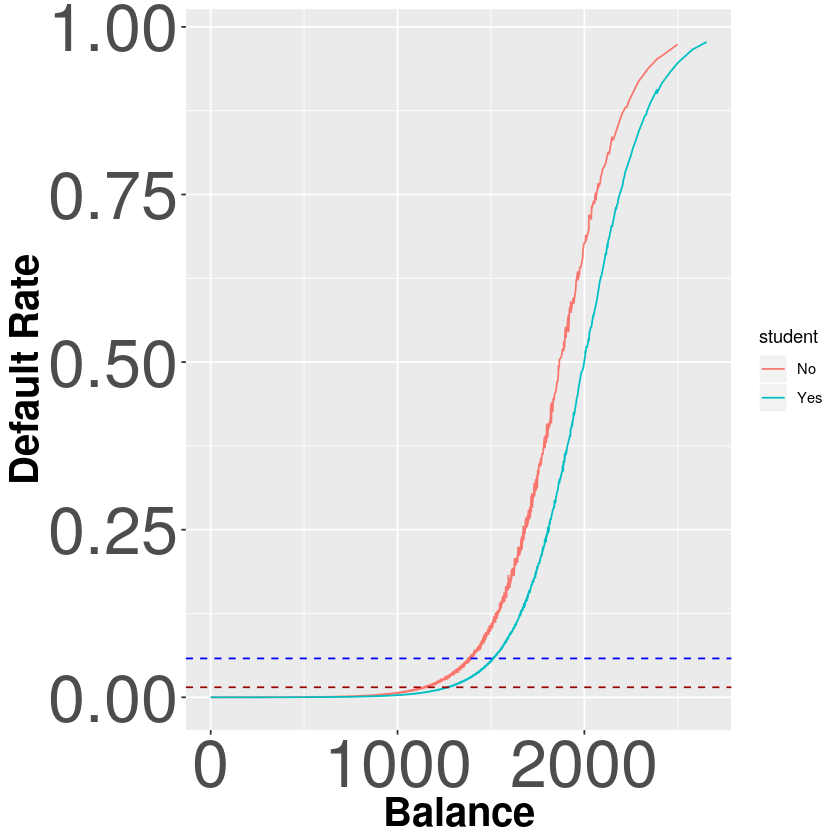

In [63]:
# plot default rates for students and non-students
ggplot(data=df, aes(x=balance, y=pred_prob_model4, group=student, colour=student)) +
  geom_line() +
  geom_hline(aes(yintercept=0.058), colour="blue", linetype="dashed")+
  geom_hline(aes(yintercept=0.015), colour="#990000", linetype="dashed") + 
  labs(x="Balance", y="Default Rate") + 
  theme(axis.text.x = element_text(size=40), axis.text.y = element_text(size=40), 
  axis.title=element_text(size=24,face="bold"))


In [64]:
## two-way Cross Tab table of Actual outcome and predicted Outcome 
xtabs(~dft + pred_outcome_model4, data = df)
#pred_outcome_model4
#dft    0    1
# 0   9627   40
# 1   228   105

   pred_outcome_model4
dft    0    1
  0 9627   40
  1  228  105

In [65]:
#Same thing can be computed with tally
tally(group_by(df,dft,pred_outcome_model4))



dft,pred_outcome_model4,n
0,0,9627
0,1,40
1,0,228
1,1,105


[1] "prediction"
attr(,"package")
[1] "ROCR"

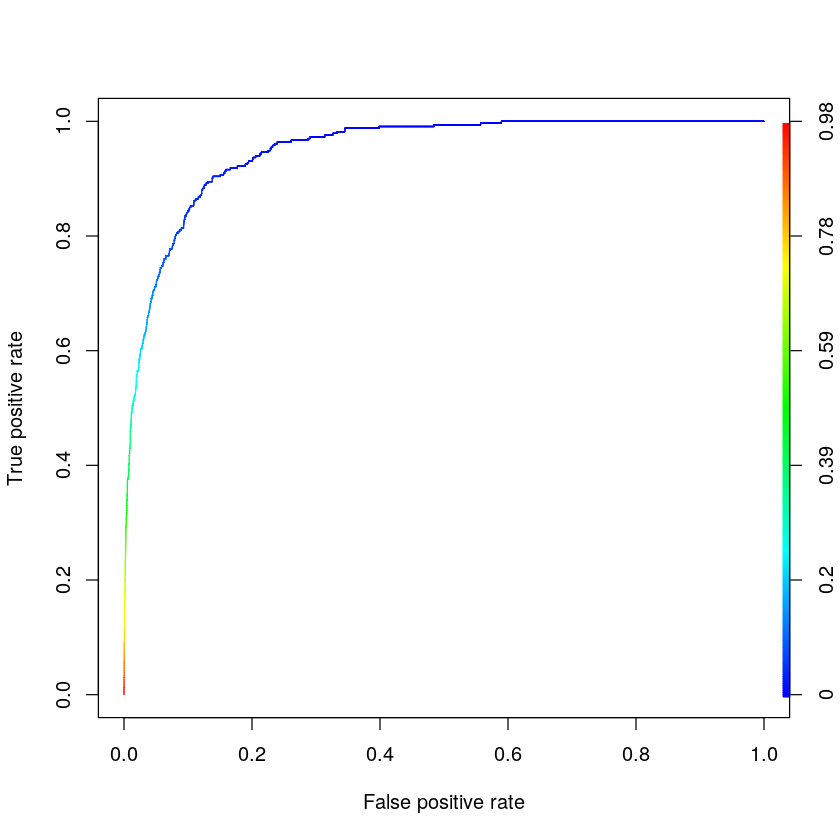

In [66]:
#ROC Curve
pred <- prediction(df$pred_prob_model4,df$dft) # create a prediction object in R
class(pred)

perf <- performance(pred, "tpr", "fpr") # tpr and fpr are true and false positive rates
plot(perf, colorize=T)



In [67]:
# calculate Area Under the Curve for this Logit Model
auc.perf <-  performance(pred, measure = "auc")
auc.perf@y.values





[[1]]
[1] 0.9495581

In [68]:
# Make predictions (using model 4) for original dataset with 0.9 as cutoff 

df <- df%>% 
  mutate(pred_outcome_0.90 = ifelse(pred_prob_model4 >= 0.90,1,0))

xtabs(~dft + pred_outcome_0.90, data = df)
# pred_outcome_0.90
# dft    0    1
# 0 9665    2
# 1  323   10



   pred_outcome_0.90
dft    0    1
  0 9665    2
  1  323   10

In [69]:
#Same thing can be computed with tally
tally(group_by(df,dft,pred_outcome_0.90))
# dft pred_outcome_0.90     n
# <dbl>             <dbl> <int>
#   1  0                 0     9665
# 2  0                 1.00     2
# 3  1.00              0      323
# 4  1.00              1.00    10


dft,pred_outcome_0.90,n
0,0,9665
0,1,2
1,0,323
1,1,10
